In [5]:
import load_faces
from sklearn import datasets, neighbors, linear_model
from matplotlib import pyplot as plt
import numpy as np

# slice_  parameter is a tuple of two slice objects
# the first slice is horizontal slice, the seond is vertical slice
# For example, (slice(70, 195), slice(78, 172)) means that
# we only want the middle part of the 250x250 image that is between 70 and 195 horizontally
# and between 78 and 172 vertically
faces = load_faces.fetch_faces('/notebook/faces', resize=250, color=False,
                                slice_=(slice(0, 250), slice(0, 250)))


['Daniel Zhang' 'Sophia Wang' 'sean xie']
Number of test images:  30
Correctly predicted images:  28
Prediction accuracy:  0.933333333333
List of incorrectly predicted images:


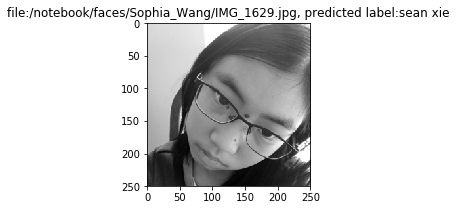

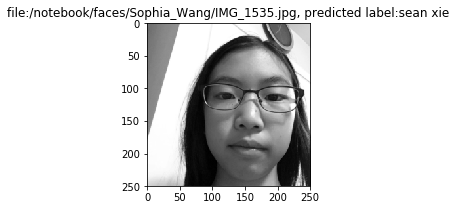

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X = faces.data
y = faces.target
# print y
print faces.target_names

n_samples = len(X)

training_data_stop_index = int(0.9 * n_samples)

X_train = X[:training_data_stop_index]
y_train = y[:training_data_stop_index]
X_test = X[training_data_stop_index:]
y_test = y[training_data_stop_index:]

# setup pipeline to take PCA, then fit a different classifier
#model = Pipeline(
#    [('PCA',PCA(n_components=50)),
#     ('CLF',GaussianNB())
#    ])

# model = svm.SVC(kernel='linear')
model = LogisticRegression()

model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)
#probabilities = model.predict_proba(X_test)

#print probabilities

print 'Number of test images: ', len(X_test)
print 'Correctly predicted images: ', sum(y_test == predicted_labels)
print 'Prediction accuracy: ', accuracy_score(y_test, predicted_labels)

print 'List of incorrectly predicted images:'

for (index, im) in enumerate(faces.images[training_data_stop_index:]):
    prediction = predicted_labels[index]
    true_label = y_test[index]
    if prediction != true_label:
        plt.figure(figsize=(3, 3))
        plt.imshow(im, cmap=plt.cm.gray)
        # plt.subplot(len(X_test),1,index+1)
        plt.title('file:' + faces.file_paths[training_data_stop_index + index] + ', ' +
                 'predicted label:' + faces.target_names[predicted_labels[index]]) # + ', ' +
                 #'probabilities: ' + str(probabilities[index]))
        plt.grid(False)
        


[[ 75  76 161 161]]


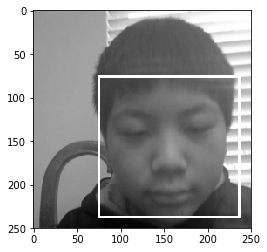

In [5]:
import cv2
#img = cv2.imread('/notebook/faces/Sophia_Wang/IMG_1565.jpg')
gray = faces.images[0]
gray = np.array(gray, dtype='uint8')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

faces2 = face_cascade.detectMultiScale(gray, scaleFactor=1.01,
    minNeighbors=1,
    minSize=(100, 100),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print faces2
for (x,y,w,h) in faces2:
    gray = cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2)
    
plt.imshow(gray, cmap=plt.cm.gray)

<Response [200]>
{u'predicted face': u'Sophia Wang'}


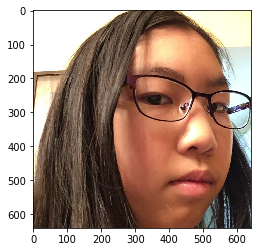

In [5]:
%matplotlib inline

import requests
from PIL import Image
from matplotlib import pyplot as plt

im = Image.open(open('/notebook/faces/Sophia_Wang/IMG_1565.jpg', 'rb'))
plt.imshow(im)
im.save('test.jpg')

url = 'http://www.arborcodemy.com:5050/whoisit'
files = {'photo': open('test.jpg', 'rb')}
# files = {'photo': im}
response = requests.post(url, files=files)
#response = requests.post(url, data=im, headers={'Content-Type': 'application/octet-stream'})

print response
print response.json()



In [7]:
import pickle

output = open('face_model.pkl', 'wb')
pickle.dump(model, output)
output.close()



In [1]:
import load_faces
import pickle

some_face = load_faces.load_one_face('/notebook/faces/Sophia_Wang/IMG_1565.jpg', resize=250, color=False,
                                slice_=(slice(0, 250), slice(0, 250)))
print some_face.shape

pkl_file = open('face_model.pkl', 'rb')
face_model = pickle.load(pkl_file)
pkl_file.close()

predicted_label = face_model.predict([some_face.flatten()])

print predicted_label




 

(250, 250)
[1]
